In [1]:
import pandas as pd
import numpy as np 
import os 
import sys
 

In [2]:
data=pd.read_csv("credit.csv")

In [3]:
data.shape

(30000, 25)

In [4]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [27]:
from sklearn.model_selection import train_test_split

In [29]:
x=data.iloc[:,:-1]

In [30]:
y=data[['default.payment.next.month']]

In [31]:
y_train.shape

(30000, 1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

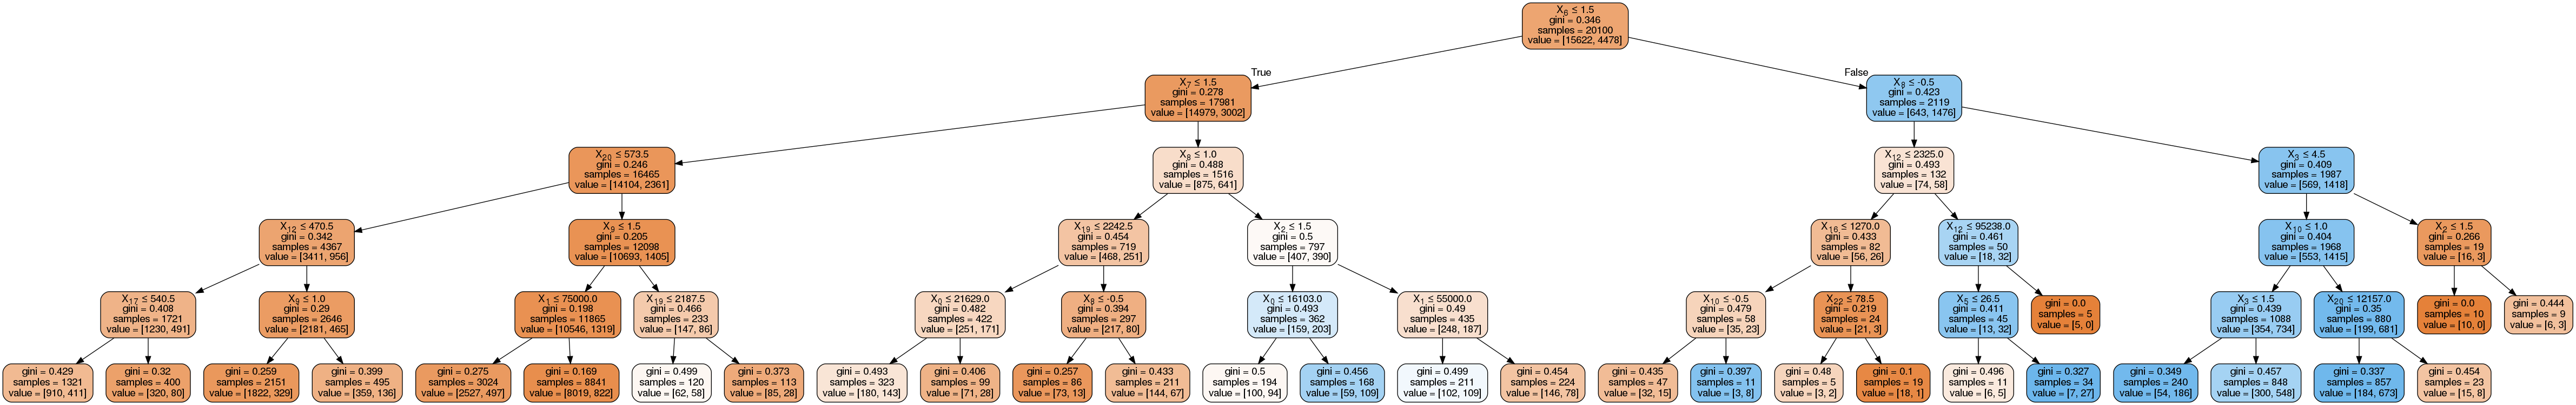

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [42]:
y_pred=clf_gini.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test,y_pred)

array([[7369,  373],
       [1399,  759]])

In [45]:
 from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred)

0.821010101010101

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [53]:
gnb.fit(X_train,y_train)

/home/srinath/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
y1_pred=gnb.predict(X_test)

In [55]:
accuracy_score(y_test,y1_pred)

0.37777777777777777

In [56]:
confusion_matrix(y_test,y1_pred)

array([[1857, 5885],
       [ 275, 1883]])

In [57]:
from sklearn import svm

In [ ]:
clf = svm.SVC(gamma='scale',kernel='linear')
clf.fit(X_train, y_train)  

/home/srinath/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
y2_predict=clf.predict(X_test)

In [62]:
confusion_matrix(y_test,y2_predict)

array([[7706,   36],
       [2137,   21]])

In [64]:
accuracy_score(y_test,y2_predict)

0.7805050505050505